<a href="https://colab.research.google.com/github/Greatmonkeysden/EEG_Emotion_recognition/blob/main/EEG_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Lib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/emotions.csv")
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [ ]:
print(data.keys())

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)


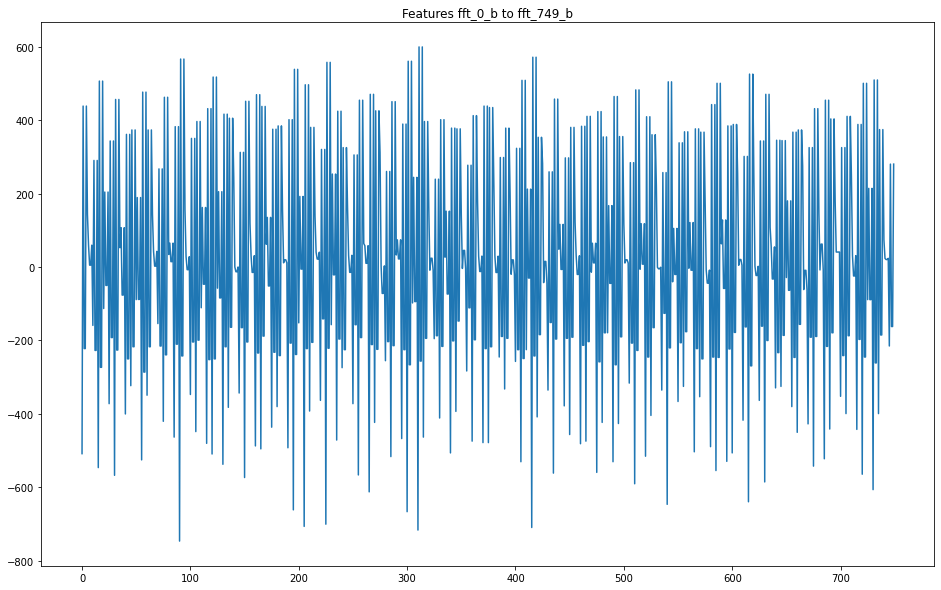

In [ ]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(16, 10)) #figure size
plt.plot(range(len(sample)), sample) #range x = length of sample, y = sample
plt.title("Features fft_0_b to fft_749_b")
plt.show()

In [ ]:
data['label'].value_counts() #inspecting data

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [ ]:
data.isnull().sum() #Checking null values

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64

In [ ]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
data['label'] = data['label'].replace(label_mapping)

In [ ]:
X = data.drop('label', axis=1)
y = data['label'].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = np.random)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X.shape[1]))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(64, input_shape=(1,2548),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             668928    
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 681,443
Trainable params: 681,443
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 50, validation_data= (X_test, y_test))

Epoch 1/50
54/54 [==============================] - 4s 17ms/step - loss: 0.5159 - accuracy: 0.8411 - val_loss: 0.2723 - val_accuracy: 0.9344
Epoch 2/50
54/54 [==============================] - 1s 10ms/step - loss: 0.2559 - accuracy: 0.9343 - val_loss: 0.2159 - val_accuracy: 0.9344
Epoch 3/50
54/54 [==============================] - 1s 10ms/step - loss: 0.2007 - accuracy: 0.9419 - val_loss: 0.1892 - val_accuracy: 0.9391
Epoch 4/50
54/54 [==============================] - 1s 10ms/step - loss: 0.1635 - accuracy: 0.9537 - val_loss: 0.1625 - val_accuracy: 0.9485
Epoch 5/50
54/54 [==============================] - 1s 10ms/step - loss: 0.1404 - accuracy: 0.9595 - val_loss: 0.1419 - val_accuracy: 0.9438
Epoch 6/50
54/54 [==============================] - 1s 10ms/step - loss: 0.1078 - accuracy: 0.9742 - val_loss: 0.1121 - val_accuracy: 0.9625
Epoch 7/50
54/54 [==============================] - 1s 10ms/step - loss: 0.0898 - accuracy: 0.9765 - val_loss: 0.0923 - val_accuracy: 0.9719
Epoch 8/50
54

In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)

model_acc = accuracy_score(expected_classes,predict_classes)
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

14/14 [==============================] - 1s 6ms/step
Test Accuracy: 97.658%
